Dataset shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
k = 2, Silhouette Score = 0.5818
k = 3, Silhouette Score = 0.4799
k = 4, Silhouette Score = 0.3850
k = 5, Silhouette Score = 0.3450
k = 6, Silhouette Score = 0.3339
k = 7, Silhouette Score = 0.2664
k = 8, Silhouette Score = 0.3416
k = 9, Silhouette Score = 0.3244
k = 10, Silhouette Score = 0.3354


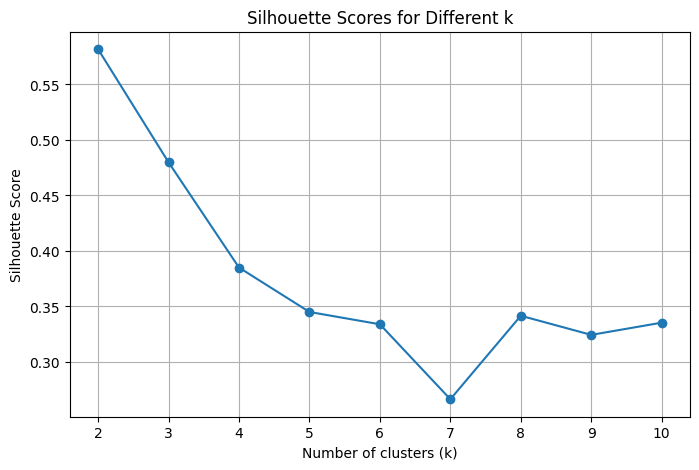


Best number of clusters (k): 2

Cluster Sizes:
0    100
1     50
Name: count, dtype: int64

Cluster Centers (standardized feature values):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.507289         -0.426631           0.652494          0.627447
1          -1.014579          0.853263          -1.304987         -1.254893

Comparison between true species and cluster labels:

Cluster Label   0   1
True Label           
0               0  50
1              50   0
2              50   0


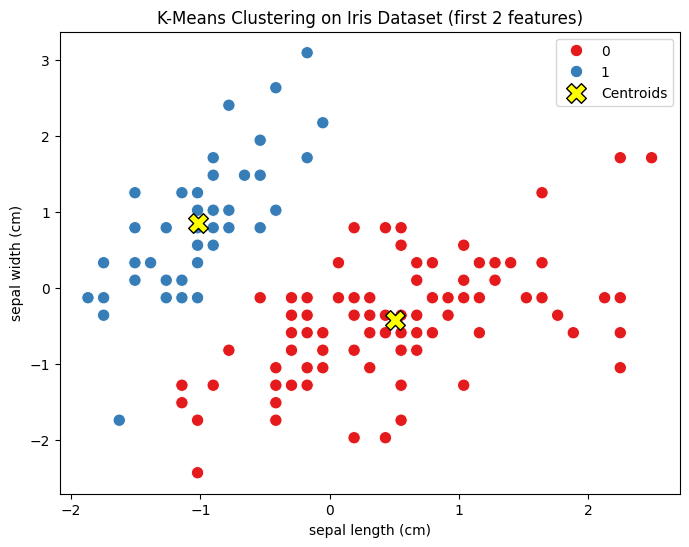


Mapping analysis:
Cluster 0 -> likely species: versicolor
Cluster 1 -> likely species: setosa


In [1]:


# ---------------------------------------------------------------
# Ex 9 - K-Means Clustering Algorithm
# Course: AI23331 - Foundations of Machine Learning
# ---------------------------------------------------------------

# 1️⃣ Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# 2️⃣ Load the Iris dataset (features only)
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

print("Dataset shape:", X.shape)
print("Feature names:", feature_names)

# 3️⃣ Standardize features so each has zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️⃣ Find the best number of clusters (k) using silhouette score
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

# Plot silhouette scores for different k
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Pick k with highest silhouette score
best_k = k_values[np.argmax(silhouette_scores)]
print("\nBest number of clusters (k):", best_k)

# 5️⃣ Fit final K-Means model with chosen k
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(X_scaled)
labels = final_kmeans.labels_

# 6️⃣ Inspect clusters
cluster_centers = final_kmeans.cluster_centers_
cluster_sizes = pd.Series(labels).value_counts().sort_index()

print("\nCluster Sizes:")
print(cluster_sizes)
print("\nCluster Centers (standardized feature values):")
print(pd.DataFrame(cluster_centers, columns=feature_names))

# Compare clusters to true species
comparison_df = pd.DataFrame({'True Label': y_true, 'Cluster Label': labels})
print("\nComparison between true species and cluster labels:\n")
print(pd.crosstab(comparison_df['True Label'], comparison_df['Cluster Label']))

# 7️⃣ Visualize clusters (using first two features)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set1', s=80)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            s=200, c='yellow', edgecolor='black', marker='X', label='Centroids')
plt.title("K-Means Clustering on Iris Dataset (first 2 features)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

# 8️⃣ Analyze mapping between clusters and species
print("\nMapping analysis:")
species_names = iris.target_names
for i in range(best_k):
    indices = np.where(labels == i)
    true_species = y_true[indices]
    most_common_species = np.bincount(true_species).argmax()
    print(f"Cluster {i} -> likely species: {species_names[most_common_species]}")


